# Alternation Histograms Figures for FRETBursts Paper

*This notebook generates the alternation histogram figures for the paper:*

<br>
<div class="alert alert-success">
<b>FRETBursts: Open Source Burst Analysis Toolkit for Confocal Single-Molecule FRET</b><br>
Ingargiola et al. (2016). biorXiv doi:<a href="http://dx.doi.org/10.1101/039198" target="_blank">10.1101/039198</a>
</div>

> The main notebook is: [FRETBursts Paper Main Notebook](FRETBursts Paper Main Notebook.ipynb)

# Loading software

Load software and define default figure style.

In [1]:
from fretbursts import *

 - Optimized (cython) burst search loaded.
 - Optimized (cython) photon counting loaded.
--------------------------------------------------------------
 You are running FRETBursts (version 0.5.5).

 If you use this software please cite the following paper:

   FRETBursts: An Open Source Toolkit for Analysis of Freely-Diffusing Single-Molecule FRET
   Ingargiola et al. (2016). http://dx.doi.org/10.1101/039198 

--------------------------------------------------------------


In [2]:
sns = init_notebook(fs=13, savefig_dpi=75)

In [3]:
figure_size = (5, 4)
default_figure = lambda: plt.subplots(figsize=figure_size)
save_figures = True

def savefig(filename, **kwargs):
    if not save_figures:
        return
    import os
    name, extension = os.path.splitext(os.path.basename(filename))
    dir_ = '../figures/%s/' % name
    kwargs_ = dict(dpi=150, bbox_inches='tight', 
                   frameon=True, facecolor='white', transparent=False)
    kwargs_.update(kwargs)
    plt.savefig(dir_ + name + extension, **kwargs_)

# Getting the data

Download the data files.

In [4]:
url = 'http://files.figshare.com/2182601/0023uLRpitc_NTP_20dT_0.5GndCl.hdf5'
download_file(url, save_dir='./data')

URL:  http://files.figshare.com/2182601/0023uLRpitc_NTP_20dT_0.5GndCl.hdf5
File: 0023uLRpitc_NTP_20dT_0.5GndCl.hdf5
 
File already on disk: /Users/anto/src/fretbursts_paper/notebooks/data/0023uLRpitc_NTP_20dT_0.5GndCl.hdf5 
Delete it to re-download.


In [5]:
filename = './data/' + url.split('/')[-1]
filename

'./data/0023uLRpitc_NTP_20dT_0.5GndCl.hdf5'

In [6]:
url2 = 'http://files.figshare.com/2182602/dsdna_d7_d17_50_50_1.hdf5'
download_file(url2, save_dir='./data')

URL:  http://files.figshare.com/2182602/dsdna_d7_d17_50_50_1.hdf5
File: dsdna_d7_d17_50_50_1.hdf5
 
File already on disk: /Users/anto/src/fretbursts_paper/notebooks/data/dsdna_d7_d17_50_50_1.hdf5 
Delete it to re-download.


In [7]:
filename2 = './data/' + url2.split('/')[-1]
filename2

'./data/dsdna_d7_d17_50_50_1.hdf5'

# Loading the data

In [8]:
d = loader.photon_hdf5(filename)
d2 = loader.photon_hdf5(filename2)

# ALEX Histogram

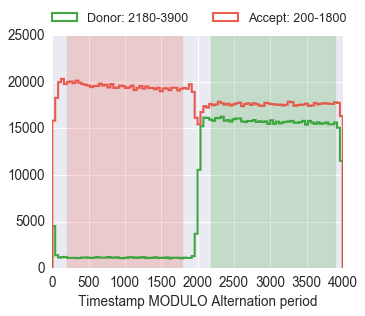

In [9]:
fig, ax = default_figure()
bpl.plot_alternation_hist(d, ax=ax)
plt.legend(bbox_to_anchor=(-0.04, 1.15), loc='upper left', ncol=2, fontsize=12)
plt.title('')
sns.despine()

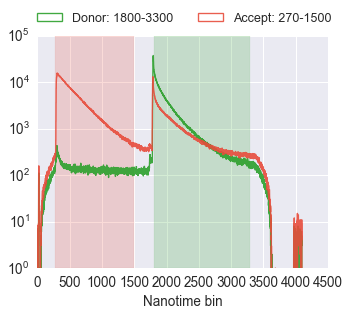

In [10]:
fig, ax = default_figure()
bpl.plot_alternation_hist(d2, ax=ax)
plt.legend(bbox_to_anchor=(-0.04, 1.15), loc='upper left', ncol=2, fontsize=12)
plt.title('')
sns.despine()

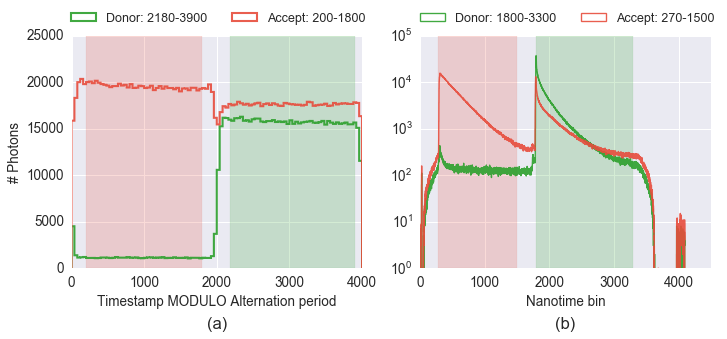

In [11]:
fig, ax = plt.subplots(1, 2, figsize=(11, 4))
bpl.plot_alternation_hist(d, ax=ax[0])
ax[0].legend(bbox_to_anchor=(-0.04, 1.15), loc='upper left', ncol=2, fontsize=12)
ax[0].set_title('')
ax[0].set_ylabel('# Photons')

bpl.plot_alternation_hist(d2, ax=ax[1])
ax[1].legend(bbox_to_anchor=(-0.04, 1.15), loc='upper left', ncol=2, fontsize=12)
ax[1].set_title('')
for a, label in zip(ax, ['a', 'b']):
    a.set_xticks(np.arange(0, 4500, 1000))
    a.text(0.5, -0.26, '(%s)' % label, transform=a.transAxes, fontsize=16,
           horizontalalignment='center',)

savefig('ALEX_alternation_double.png')